In [1]:
import os, shutil
import matplotlib.pyplot as plt
from tensorflow import keras
import scipy
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# Loading the Data

In [2]:
data_dir = './train'
base_dir = './dataSet'

In [3]:
if os.path.exists(base_dir):
    os.remove(base_dir)

os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [5]:
for i in range(1000):
    cat_src = os.path.join(data_dir, f"cat.{i}.jpg")
    dog_src = os.path.join(data_dir, f"dog.{i}.jpg")
    cat_dst = os.path.join(train_cats_dir, f"cat.{i}.jpg")
    dog_dst = os.path.join(train_dogs_dir, f"dog.{i}.jpg")
    shutil.copyfile(cat_src, cat_dst)
    shutil.copyfile(dog_src, dog_dst)

for i in range(1000, 1500):
    cat_src = os.path.join(data_dir, f"cat.{i}.jpg")
    dog_src = os.path.join(data_dir, f"dog.{i}.jpg")
    cat_dst = os.path.join(validation_cats_dir, f"cat.{i}.jpg")
    dog_dst = os.path.join(validation_dogs_dir, f"dog.{i}.jpg")
    shutil.copyfile(cat_src, cat_dst)
    shutil.copyfile(dog_src, dog_dst)

for i in range(1500, 2000):
    cat_src = os.path.join(data_dir, f"cat.{i}.jpg")
    dog_src = os.path.join(data_dir, f"dog.{i}.jpg")
    cat_dst = os.path.join(test_cats_dir, f"cat.{i}.jpg")
    dog_dst = os.path.join(test_dogs_dir, f"dog.{i}.jpg")
    shutil.copyfile(cat_src, cat_dst)
    shutil.copyfile(dog_src, dog_dst)

In [6]:
print(len(os.listdir(train_cats_dir)), len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)), len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)), len(os.listdir(test_dogs_dir)))

1000 1000
500 500
500 500


# Neural Network

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# Preprocessing the Data

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/100
 41/100 [===========>..................] - ETA: 24s - loss: 0.7010 - accuracy: 0.4756

KeyboardInterrupt: 

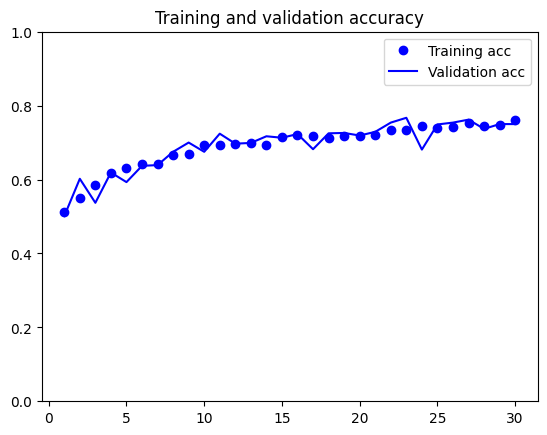

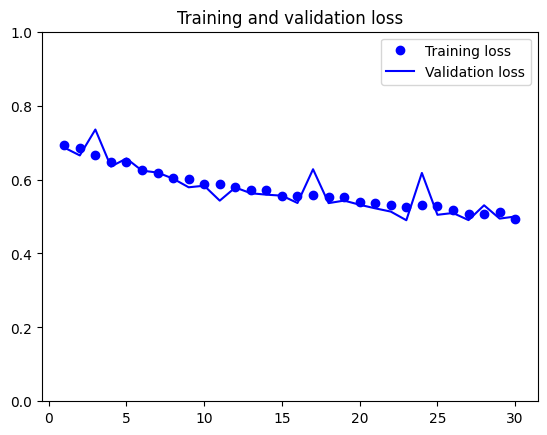

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim(0,1)
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim(0,1)
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

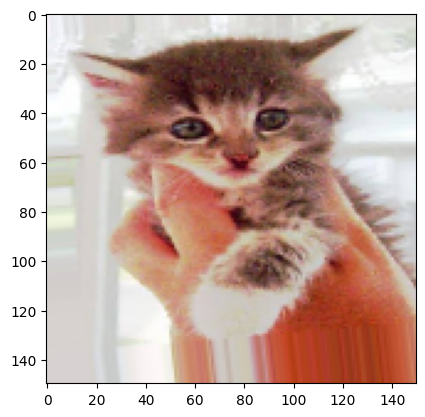

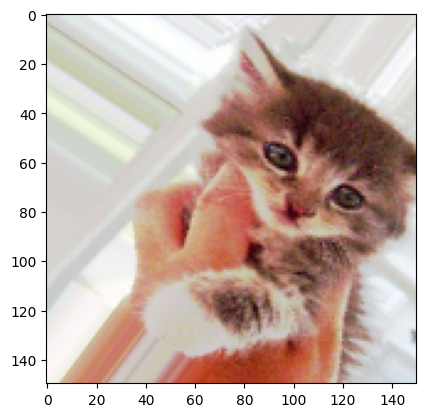

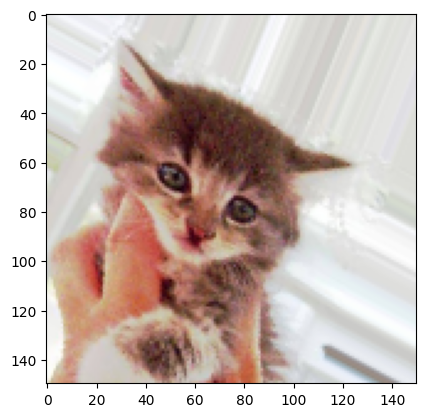

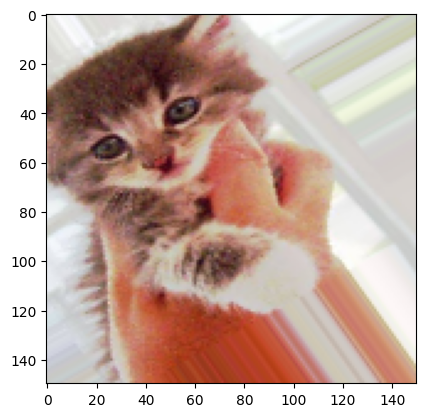

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = keras.utils.load_img(img_path, target_size=(150, 150))
x = keras.utils.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Pretrained Covnets